In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogsvscats

100% 1.06G/1.06G [00:10<00:00, 108MB/s] 
100% 1.06G/1.06G [00:10<00:00, 108MB/s]


In [3]:
!unzip /content/dogsvscats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# Generators
train_ds  = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)
validation_ds  = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [21]:
#CNN model


model  = Sequential()

#Convolutional Layers
model.add(Conv2D(32,kernel_size=(2,2),padding="same",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="same"))

model.add(Conv2D(64,kernel_size=(2,2),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="same"))

model.add(Conv2D(128,kernel_size=(2,2),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="same"))

model.add(Flatten())

# Dense/Fully Connected Layers
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
tf.keras.regularizers.l2(0.01)

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
tf.keras.regularizers.l2(0.01)


model.add(Dense(1,activation="sigmoid"))


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      416       
                                                                 
 batch_normalization_3 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      8256      
                                                                 
 batch_normalization_4 (Bat  (None, 128, 128, 64)      256       
 chNormalization)                                                
                                                      

In [23]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [24]:
record  = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 102ms/step - loss: 1.1377 - accuracy: 0.5640 - val_loss: 0.6433 - val_accuracy: 0.5996
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6655 - accuracy: 0.5863 - val_loss: 0.6459 - val_accuracy: 0.6482
Epoch 3/10
625/625 [==============================] - 61s 97ms/step - loss: 0.6500 - accuracy: 0.6036 - val_loss: 0.6426 - val_accuracy: 0.6008
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6319 - accuracy: 0.6427 - val_loss: 0.5947 - val_accuracy: 0.6822
Epoch 5/10
625/625 [==============================] - 61s 97ms/step - loss: 0.5956 - accuracy: 0.6851 - val_loss: 0.5692 - val_accuracy: 0.7298
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5874 - accuracy: 0.6946 - val_loss: 0.5751 - val_accuracy: 0.7146
Epoch 7/10
625/625 [==============================] - 60s 96ms/step - loss: 0.5671 - accuracy: 0.7125 - val_loss: 0.5892 - val_accur

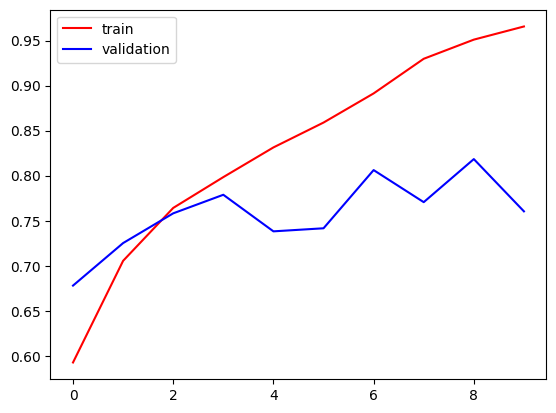

In [11]:
import matplotlib.pyplot as plt

#Graph between training accuracy and validation accuracy
plt.plot(record.history['accuracy'],color="red",label="train")
plt.plot(record.history['val_accuracy'],color="blue",label ="validation")
plt.legend()
plt.show()

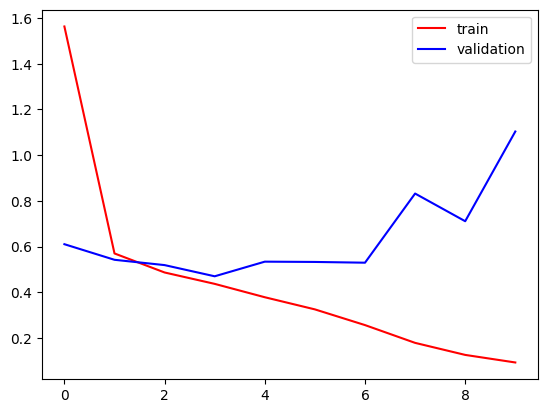

In [12]:
#Graph between training loss and validation loss
plt.plot(record.history['loss'],color="red",label="train")
plt.plot(record.history['val_loss'],color="blue",label ="validation")
plt.legend()
plt.show()

In [13]:
# Ways to reduce overfitting
# 1. Add more data
# 2. Data augmentation
# 3. Batch Normalization
# 4. Dropouts
# 5. Regularizations(L1 and L2)
# 6. Reduce Complexity

In [14]:
#Testing
import cv2

In [15]:
test_img = cv2.imread("/content/test/dogs/dog.10372.jpg")

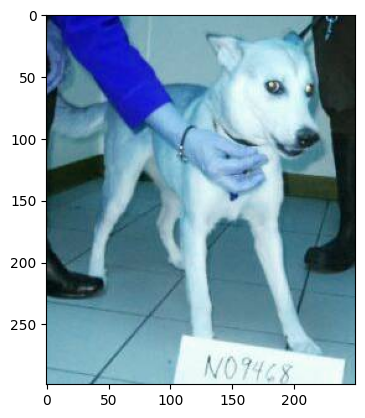

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(299, 250, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))

In [19]:
test_input = test_img.reshape((1,256,256,3))  # 1 is batch size as per previous format

In [20]:
model.predict(test_input)

1/1 [==============================] - 0s 457ms/step


array([[0.]], dtype=float32)